In [1]:
import torch 
from torch import nn

from WGAN import Generator, initialize_weights
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Device agnostic code

if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
device

'cuda'

In [3]:
# Hyperparameters 

IMAGE_SIZE = 64
CHANNELS = 1
NUM_CLASSES = 10
GEN_EMBEDDING = 256
Z_DIM = 256
GEN_HIDDEN = 64

GENERATOR_SAVE_PATH = 'Models/mnist_first_generator.pth'

In [4]:
# Creating model instances

generator = Generator(latent_channels=Z_DIM, hidden_channels=GEN_HIDDEN, img_channels=CHANNELS, num_classes=NUM_CLASSES, img_size=IMAGE_SIZE, embed_size=GEN_EMBEDDING).to(device)
initialize_weights(generator)

In [5]:
# Loading models

model_file = Path(GENERATOR_SAVE_PATH)
if model_file.is_file():
    generator.load_state_dict(torch.load(f=GENERATOR_SAVE_PATH))
    print("A generator exists in the specified path... Loading that model...")
else:
    print("A generator does not exist in the specified path...")

A generator exists in the specified path... Loading that model...


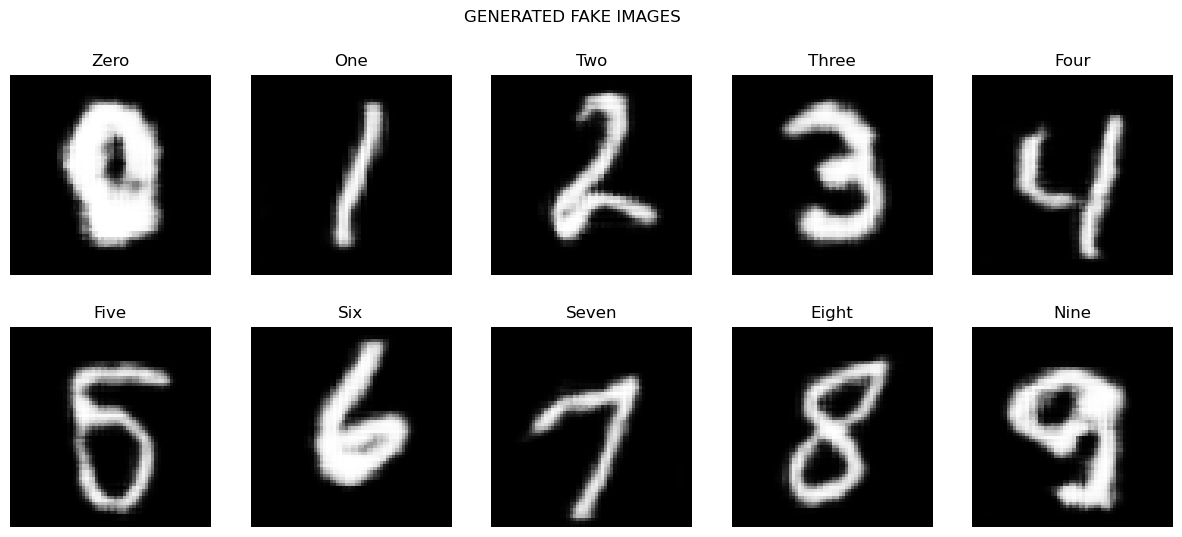

In [24]:
# Generating random images with the given label(s)
labels = torch.tensor([0,1,2,3,4,5,6,7,8,9]).to(device)
title = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
noise = torch.randn(labels.shape[0], Z_DIM, 1, 1, device=device)
generator.eval()
with torch.inference_mode():
    fake_img = generator(noise, labels)

# Plotting those images
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(ax.flat):
    ax.imshow(fake_img[i].permute(1,2,0).cpu(), cmap='gray')
    ax.set_title(title[i])
    ax.axis(False);
    
plt.suptitle('GENERATED FAKE IMAGES')
plt.show()